In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.spatial import distance


In [21]:
file='s.csv'
df=pd.read_csv(file)

In [22]:
df.head()

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


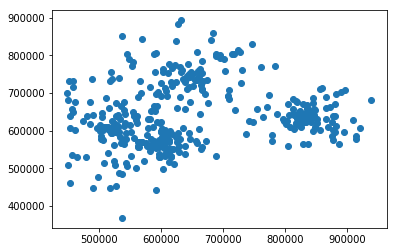

In [24]:
plt.scatter(df['x1'],df['x2'])


In [25]:
def Min(clusters ,cluster_num):
    while len(clusters) is not cluster_num:
        # Clustering           (
        closest_distance=clust_1=clust_2 = math.inf
        
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for point_id,point in enumerate(cluster): 
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    for point2_id, point2 in enumerate(cluster2):
                        if distance.euclidean(point,point2) < closest_distance: 
                            closest_distance = distance.euclidean(point,point2)
                            clust_1 = cluster_id
                            clust_2 = cluster2_id+cluster_id+1
        
        clusters[clust_1].extend(clusters[clust_2]) 
        clusters.pop(clust_2) 
    return(clusters)

In [26]:

def Max(clusters ,cluster_num):
    
    while len(clusters) is not cluster_num:
                
        closest_distance=clust_1=clust_2 = math.inf
        
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = 0

                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):
                        if furthest_cluster_dist < distance.euclidean(point,point2): 
                            furthest_cluster_dist = distance.euclidean(point,point2)
            # to compare that the furtherest distance is less than any furtherest distance
                if furthest_cluster_dist < closest_distance:
                    closest_distance = furthest_cluster_dist
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
        clusters[clust_1].extend(clusters[clust_2])      
        clusters.pop(clust_2) 
    return(clusters)

In [27]:
def Average(clusters ,cluster_num):
    
    while len(clusters) is not cluster_num:
                
        closest_distance=clust_1=clust_2 = math.inf
        
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]):  
                furthest_cluster_dist = 0
                d=0
                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):
                          d += distance.euclidean(point,point2)
                d /= (len(cluster)*len(cluster2))
                        #if furthest_cluster_dist < distance.euclidean(point,point2): 
                            #furthest_cluster_dist = distance.euclidean(point,point2)
            # to compare that the furtherest distance is less than any furtherest distance
                if d < closest_distance:
                    closest_distance = d
                    clust_1 = cluster_id
                    clust_2 = cluster2_id+cluster_id+1
        clusters[clust_1].extend(clusters[clust_2])      
        clusters.pop(clust_2) 
    return(clusters)

In [28]:
def hierarchical(data, cluster_num, type_of):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x1'], row['x2']]])
    if type_of=='min':
        return Min(init_clusters, cluster_num)
    elif type_of=='max':
        return Max(init_clusters, cluster_num)
    elif type_of=='avg':
        return Average(init_clusters, cluster_num)

Text(0, 0.5, 'x2')

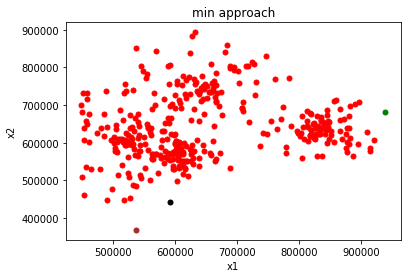

In [37]:
#applying min:
clusters = hierarchical(df,4,'min')
colors = ['red', 'green', 'black', 'brown']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]],marker='o', markersize=5,color=colors[cluster_index])
plt.title('min approach')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

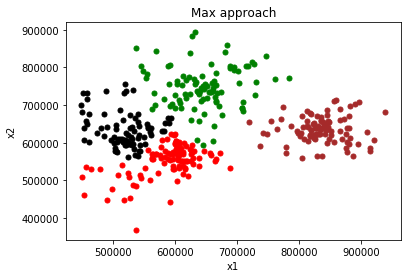

In [36]:
clusters = hierarchical(df,4,'max')
colors = ['red', 'green', 'black', 'brown']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=5,color=colors[cluster_index])
plt.title('Max approach')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

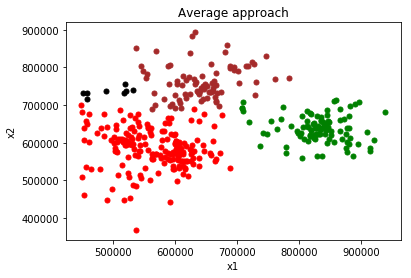

In [35]:
#applying average:
clusters = hierarchical(df,4,'avg')
colors = ['red', 'green', 'black', 'brown']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]],marker='o', markersize=5, color=colors[cluster_index])
plt.title('Average approach')
plt.xlabel('x1')
plt.ylabel('x2')